I'm using a dataset on 400000 NYSE investments made over a decade in order to draw some conclusions on where a young person with interest in investing (like me) might want to put their money (which was ideally made working as a software engineering intern)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df_raw = pd.read_csv('../data/final_transactions_dataset.csv',engine='python')

#we only care about the years right now, so we cut the date columns down accordingly
df_raw[['buy_date', 'buy_date_month', 'buy_date_day']] = df_raw['date_BUY_fix'].str.split('-', expand=True)
df_raw[['sell_date', 'sell_date_month', 'sell_date_day']] = df_raw['date_SELL_fix'].str.split('-', expand=True)
df_raw = df_raw.drop(['buy_date_month', 'buy_date_day', 'sell_date_month', 'sell_date_day'
                      , 'date_BUY_fix', 'date_SELL_fix'], axis=1)

#taking a peek at our data before we move forward (good coding practice if you ask us)
df_raw.head()

,Unnamed: 0,company,sector,horizon (days),amount,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,...,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio,buy_date,sell_date
0,0,BBY,RETAIL,2,100,55.551804,53.483913,0.383666,0.385748,0.383666,...,12.58,3.73,0.38,3.19,3.01,1.49,8.69,26.69,2017,2017
1,1,BAC,BANK,330,15000,18.616749,24.654472,0.322809,0.236350,0.322809,...,11.39,1.26,1.71,0.54,15.70,0.92,0.67,5.54,2016,2017
2,2,AXP,BANK,7,3000,59.862297,59.517727,0.238642,0.235491,0.238642,...,10.58,5.64,1.67,2.60,15.68,1.91,3.39,25.78,2016,2016
3,3,KSS,RETAIL,5,20000,38.216724,35.985329,0.428559,0.429340,0.428559,...,11.09,3.27,0.36,1.25,3.17,1.60,4.41,11.35,2016,2016
4,4,JPM,BANK,360,15000,51.869335,52.047966,0.194612,0.254011,0.194612,...,9.38,5.46,1.87,0.81,19.91,0.99,0.81,8.91,2015,2016


After reading through that data, we decide we want to get rid of the columns we have no use for (for this project at least)

In [2]:
df = df_raw.drop(['horizon (days)', 'Volatility_Buy', 'PE_ratio', 'EPS_ratio', 'PS_ratio', 'PB_ratio',
                  'NetProfitMargin_ratio', 'current_ratio', 'roa_ratio', 'roe_ratio', 'Sharpe Ratio',
                  'expected_return (yearly)', 'inflation', 'nominal_return', 'investment', 'Volatility_sell'], axis=1)
#taking another peek at our data
df.head()

,Unnamed: 0,company,sector,amount,price_BUY,price_SELL,ESG_ranking,buy_date,sell_date
0,0,BBY,RETAIL,100,55.551804,53.483913,12.0,2017,2017
1,1,BAC,BANK,15000,18.616749,24.654472,26.3,2016,2017
2,2,AXP,BANK,3000,59.862297,59.517727,19.8,2016,2016
3,3,KSS,RETAIL,20000,38.216724,35.985329,12.9,2016,2016
4,4,JPM,BANK,15000,51.869335,52.047966,27.9,2015,2016


Much better! As useful as those columns are, they are of no help as far as our project goes (we know what every single one of those ratios mean by the way)

Moving on, we want to make a simple profit column (sell price - buy price). Watch this.

In [3]:
df['profit'] = df['price_SELL'] - df['price_BUY']
df.head()

,Unnamed: 0,company,sector,amount,price_BUY,price_SELL,ESG_ranking,buy_date,sell_date,profit
0,0,BBY,RETAIL,100,55.551804,53.483913,12.0,2017,2017,-2.067890
1,1,BAC,BANK,15000,18.616749,24.654472,26.3,2016,2017,6.037724
2,2,AXP,BANK,3000,59.862297,59.517727,19.8,2016,2016,-0.344570
3,3,KSS,RETAIL,20000,38.216724,35.985329,12.9,2016,2016,-2.231396
4,4,JPM,BANK,15000,51.869335,52.047966,27.9,2015,2016,0.178631


Too easy. Now, lets get to the conclusion drawing part.

Let's see what sectors have gotten investors the best returns

In [4]:
df.groupby('sector')['profit'].mean()

sector
AUTO       0.070168
BANK       1.301379
FMCG       2.907156
RETAIL     4.067006
TECH      43.180058
Name: profit, dtype: float64

Tech for the win!

Automotive bringing in numbers that low brings smiles to our faces (we stand with the strikers in Detroit). Speaking of the strikes, let's see if there's any correlation between ESG rankings and these profits.

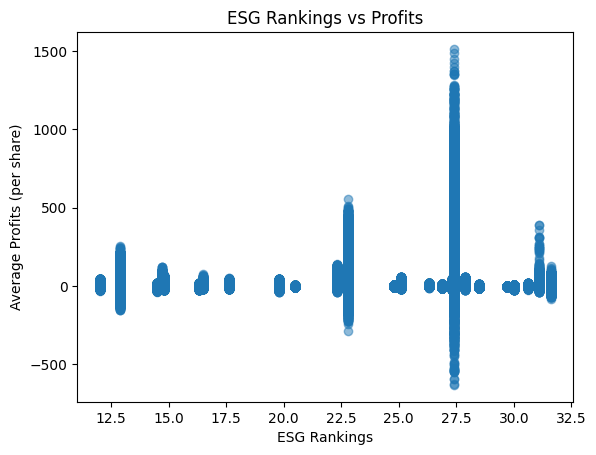

In [5]:
plt.scatter(df['ESG_ranking'], df['profit'], alpha=0.5)
plt.xlabel('ESG Rankings')
plt.ylabel('Average Profits (per share)')
plt.title('ESG Rankings vs Profits')
plt.show()

This is a wild looking scatterplot. Can't say ESG rankings impact profit much. We still stand with the strikers though.

Let's see how share prices changed throughout the decade.

In [6]:
df.groupby('buy_date')['price_BUY'].mean()

buy_date
2013     57.465370
2014     60.054983
2015     87.832413
2016     98.520347
2017    125.061204
2018    170.191370
Name: price_BUY, dtype: float64

In [7]:
df.groupby('sell_date')['price_BUY'].mean()

sell_date
2013     56.397376
2014     58.450527
2015     77.762144
2016     91.401547
2017    112.887369
2018    148.023602
2019    157.965617
2020    181.252471
Name: price_BUY, dtype: float64

It's safe to say NYSE has been doing well (generally speaking).

CONCLUSIONS:

- Tech has been crushing it

- ESG rankings don't have a strong correlation with profits from investments

- NYSE share prices have gone up on average over the years, so the economy was booming (then 2020 came along)
